# The perceptron (1)
<img title="perceptron" alt="perceptron" src="perceptron.png">

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.layers import LSTM, SimpleRNN, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import tensorflow as tf

import yfinance as yf
import datetime as dt
import math

In [3]:
def unit_step(x: float | int) -> float:
    if x > 0:
        return 1.0
    else:
        return 0.0
    
def perceptron(x: np.ndarray, w: np.ndarray, bias: float) -> float:
    return unit_step(bias + np.dot(x, w))

In [4]:
# Logical functions

def NOT_percep(x):
    # Note: differently from the slide, on a
    # For Python code is better to consider b = 0.5
    return perceptron(x, w=np.array(-1), bias=0.5)

def AND_percep(x):
    w = np.array([1.0, 1.0])
    b = -1.0
    return perceptron(x, w, b)


def OR_percep(x):
    w = np.array([1.0, 1.0])
    b = -0.5
    return perceptron(x, w, b)

In [5]:
# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])


print("NOT(0) = {}".format(NOT_percep(0)))
print("NOT(1) = {}".format(NOT_percep(1)))

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))

NOT(0) = 1.0
NOT(1) = 0.0
AND(1, 1) = 1.0
AND(1, 0) = 0.0
AND(0, 1) = 0.0
AND(0, 0) = 0.0
OR(1, 1) = 1.0
OR(1, 0) = 1.0
OR(0, 1) = 1.0
OR(0, 0) = 0.0


# Perceptron (2)
Evaluate a perceptron model on the dataset

In [6]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# Initialize model
model = Perceptron()

# Define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.847 (0.052)


# Perceptron 3
make a prediction with a perceptron model on the dataset

In [7]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

# Initialize model
model = Perceptron()

# Fit model
model.fit(X, y)

# Generate randm row
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]

# Make prediction
y_hat = model.predict([row])

# Summarize prediction
print('Predicted Class: %d' % y_hat[0])

Predicted Class: 1


# Forward Propagation

The goal of the lab consists of building a neural network from zero.
Specifically, we want to perform a prediction task using forward propagation.

<img src="ann.png">

This neural network will produce predictions through the forward propagation process. The architecture is the following:
It takes two inputs;
It has one hidden layer with two nodes, and 
an output layer with one node.

During the first step, the weights and the biases in the network are initialized randomly.
We have 6 weights and 3 biases, one for each node in the hidden layer as well as for each node in the output layer.

In [8]:
import numpy as np # import Numpy library to generate 

weights = np.around(np.random.uniform(size=6), decimals=2) # initialize the weights
biases = np.around(np.random.uniform(size=3), decimals=2) # initialize the biases

print(weights)
print(biases)

[0.42 0.77 0.2  0.58 0.88 0.13]
[0.06 0.96 0.9 ]


In [9]:
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

print('x1 is', x_1, 'and x2 is', x_2)

z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]

print('The weighted sum of the inputs at the first node in the hidden layer is', z_11)

z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]

print('The weighted sum of the inputs at the second node in the hidden layer is', np.around(z_12, decimals=4))

# Sigmoid
a_11 = 1.0 / (1.0 + np.exp(-z_11))

print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))

# Sigmoid
a_12 = 1.0 / (1.0 + np.exp(-z_12))

print('The activation of the second node in the hidden layer is', np.around(a_12, decimals=4))

### Calculate the weighted sum
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]

print('The weighted sum of the inputs at the node in the output layer is', np.around(z_2, decimals=4))

### AGain, calculate the sigmoid

a_2 = 1.0 / (1.0 + np.exp(-z_2))

print('The output of the network for x1 = 0.5 and x2 = 0.85 is', np.around(a_2, decimals=4))

x1 is 0.5 and x2 is 0.85
The weighted sum of the inputs at the first node in the hidden layer is 0.9244999999999999
The weighted sum of the inputs at the second node in the hidden layer is 1.553
The activation of the first node in the hidden layer is 0.716
The activation of the second node in the hidden layer is 0.8253
The weighted sum of the inputs at the node in the output layer is 1.6373
The output of the network for x1 = 0.5 and x2 = 0.85 is 0.8372


In [10]:
# We can do calculations in a better way

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.array((x_1, x_2))
W_1 = weights[:4].reshape(2, 2)
W_2 = weights[4:]
b_1 = biases[:2]
b_2 = biases[2:]
print(f'{x = }')
print(f'{W_1 = }')
print(f'{W_2 = }')
print(f'{b_1 = }')
print(f'{b_2 = }')

print(f'{sigmoid(W_1 @ x + b_1) = }')
print(f'{sigmoid(W_2 @ sigmoid(W_1 @ x + b_1) + b_2) = }')

x = array([0.5 , 0.85])
W_1 = array([[0.42, 0.77],
       [0.2 , 0.58]])
W_2 = array([0.88, 0.13])
b_1 = array([0.06, 0.96])
b_2 = array([0.9])
sigmoid(W_1 @ x + b_1) = array([0.71595812, 0.8253466 ])
sigmoid(W_2 @ sigmoid(W_1 @ x + b_1) + b_2) = array([0.83717242])


# ANN with Keras
We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag (Scorie d'altoforno)</strong>

<strong>3. Fly Ash (Ceneri volanti, per migliorare la qualità del cemento)</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

In [14]:
concrete_data = pd.read_csv('datasets/concrete_data.csv')
print(f'{concrete_data.shape = }')

concrete_data.shape = (1030, 9)


So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


In [16]:
display(concrete_data.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
display(concrete_data.describe())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

In [21]:
print(concrete_data.isnull().sum())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


The data looks very clean and is ready to be used to build our model.

In [25]:
# Divide X and y
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

display(predictors.head())
display(target.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [26]:
# Scale data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
display(predictors_norm.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


# Build neural network

Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.

# Note
In Keras, the input layer itself is not a layer, but a tensor (we will discuss tensors in the next lecture). This tensor must have the same shape as your training data. Example: if you have 30 images of 50x50 pixels in RGB (3 channels), the shape of your input data is (30,50,50,3)

<b>In our case, n_cols must be initialized to the number of predictors</b>


In [29]:
# define regression model
n_cols = predictors_norm.shape[1] # number of predictors
print(f'{n_cols = }')

def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

n_cols = 8


In [38]:
model = regression_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                450       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3051 (11.92 KB)
Trainable params: 3051 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Train and test network

In [40]:
# fit the model
history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 1s - loss: 1671.6779 - val_loss: 1189.5118 - 796ms/epoch - 35ms/step
Epoch 2/100
23/23 - 0s - loss: 1565.7458 - val_loss: 1103.8325 - 103ms/epoch - 4ms/step
Epoch 3/100
23/23 - 0s - loss: 1380.9669 - val_loss: 957.9128 - 83ms/epoch - 4ms/step
Epoch 4/100
23/23 - 0s - loss: 1088.3525 - val_loss: 748.7414 - 96ms/epoch - 4ms/step
Epoch 5/100
23/23 - 0s - loss: 725.8071 - val_loss: 519.2925 - 95ms/epoch - 4ms/step
Epoch 6/100
23/23 - 0s - loss: 432.4219 - val_loss: 332.8972 - 88ms/epoch - 4ms/step
Epoch 7/100
23/23 - 0s - loss: 286.8087 - val_loss: 230.8341 - 86ms/epoch - 4ms/step
Epoch 8/100
23/23 - 0s - loss: 242.4886 - val_loss: 194.7405 - 81ms/epoch - 4ms/step
Epoch 9/100
23/23 - 0s - loss: 224.2908 - val_loss: 179.5577 - 91ms/epoch - 4ms/step
Epoch 10/100
23/23 - 0s - loss: 213.1011 - val_loss: 171.2583 - 105ms/epoch - 5ms/step
Epoch 11/100
23/23 - 0s - loss: 203.0798 - val_loss: 166.8511 - 85ms/epoch - 4ms/step
Epoch 12/100
23/23 - 0s - loss: 195.8419 - val_loss: 

<Axes: >

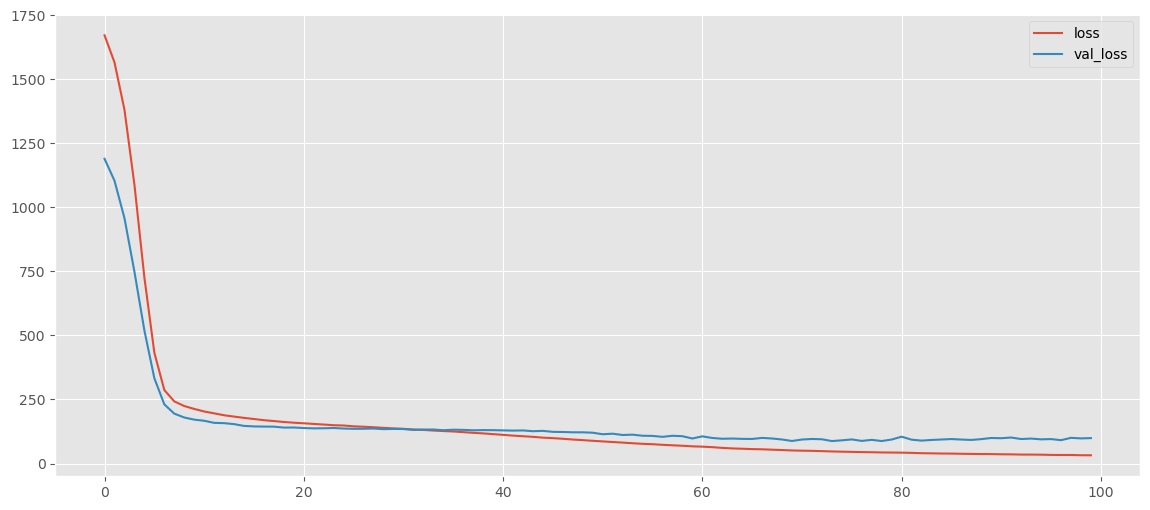

In [46]:
plt.style.use('ggplot')
pd.DataFrame(history.history).plot(figsize=(14, 6))

# RNN
**Import the required libraries.**

Numpy & Pandas – For data manipulation and analysis

Matplotlib – For data visualization.

Yahoo Finance – Provides financial data for analysis.

Datetime – For working with dates and times.

Math – Provides basic mathematical functions in Python.

This code uses the **yf.download()** method of the *yfinance* library to download historical stock data for Google from Yahoo Finance. 

Using the **dt.datetime()** method of the datetime module, the start and end dates of the time period for which the data has been obtained are given.

The downloaded data is then shown using the **print()** function, where the Pandas DataFrame’s display options are configured using **pd.set_option()**.

In [49]:
#the start and end date
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

# pd.set_option('display.max_rows', 4)
# pd.set_option('display.max_columns',5)
display(data)

C:\Users\lucat\anaconda3\envs\DEEP_LEARNING\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,56.200001,56.471001,54.674500,55.105000,55.041828,51970000
2020-04-02,55.000000,56.138500,54.656502,55.851501,55.787476,56410000
2020-04-03,55.735500,55.939499,53.754002,54.634998,54.572365,51374000
2020-04-06,56.650002,59.537498,56.250000,59.159500,59.091682,63320000
2020-04-07,60.850498,61.039001,58.862499,59.127998,59.060215,61620000
...,...,...,...,...,...,...
2023-03-27,104.620003,104.760002,101.930000,102.459999,102.342545,31120900
2023-03-28,102.440002,102.449997,99.739998,101.029999,100.914177,32057900
2023-03-29,102.279999,102.489998,100.650002,101.389999,101.273766,28779600


# Next... 
we split the dataset into **training** and **testing** in the ratio *80:20*. Only the first column of the data is chosen using *iloc[:,:1]* and the train_data contains the first *training_data_len* rows of the original data. The *test_data*, contains all of the remaining rows of the original data starting from training_data_len to the end.

# iloc[]
iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

For example, if *df* is a dataframe, the following holds:

df.iloc[:3] # slice your object, i.e. first three rows of your dataframe

df.iloc[0:3] # same

df.iloc[0, 1] # index both axis. Select the element from the first row, second column.

df.iloc[:, 0:5] # first five columns of data frame with all rows

In [57]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * 0.8)
print(f'{data.shape = }') 

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(f'{train_data.shape = }, {test_data.shape = }')

data.shape = (756, 6)
train_data.shape = (605, 1), test_data.shape = (151, 1)


In [58]:
display(train_data)

,Open
Date,
2020-04-01,56.200001
2020-04-02,55.000000
2020-04-03,55.735500
2020-04-06,56.650002
2020-04-07,60.850498
...,...
2022-08-18,119.430000
2022-08-19,119.059998
2022-08-22,115.199997


# Reshaping arrays
Reshaping means changing the shape of an array.

The shape of an array is the number of elements in each dimension.

By reshaping we can add or remove dimensions or change number of elements in each dimension.

# Example: reshape From row vector to column vector
Convert the following 1-D array with 12 elements into a 2-D array.

The outermost dimension will have 4 arrays, each with 3 elements:

*import numpy as np*

*arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])*

*newarr = arr.reshape(-1, 1)*

*print(newarr)*

[[ 1]

 [ 2]

 [ 3]
 
 [ 4]
 
 [ 5]
 
 [ 6]
 
 [ 7]
 
 [ 8]
 
 [ 9]
 
 [10]
 
 [11]
 
 [12]]

# This code...
creates a numpy array called *dataset_train* and populates it with the “Open” pricing values from the training data. The 1-dimensional array is then transformed into a 2-dimensional array. The shape property, which returns the tuple (num_rows, num_columns) denoting the dataset_train array’s final shape.

In [62]:
# Selecting Open Price values
dataset_train = train_data.Open.values 
print(f'{dataset_train.shape = }') # Row vector

dataset_train.shape = (605,)


In [63]:
# Reshaping the array

dataset_train = dataset_train.reshape(-1, 1) # column vector
print(f'{dataset_train.shape = }')

dataset_train.shape = (605, 1)


In [67]:
print(dataset_train[:10])

[[56.20000076]
 [55.        ]
 [55.73550034]
 [56.65000153]
 [60.8504982 ]
 [60.15499878]
 [60.9090004 ]
 [60.07500076]
 [61.99850082]
 [62.32550049]]


# Normalization 
is a crucial step in data preprocessing to enhance the effectiveness and interpretability of machine learning models. Hence **MinMaxScaler** from *sklearn* is imported to scale the dataset from 0 to 1. Using the sklearn fit_transform() method, the training dataset is scaled

# What MinMaxScaler does?
*MinMaxScaler* subtracts the **minimum value** in the feature and then divides by the range. 

The range is the difference between the original maximum and original minimum. 

*MinMaxScaler* preserves the shape of the original distribution

*feature_range=(0,1)* means that the value are normalized so that they will have a value between 0 and 1

In [70]:
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

# Print the first 5 rows of the dataframe
print(scaled_train[:10])

[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]
 [0.05355843]
 [0.06139221]
 [0.05272728]
 [0.0727117 ]
 [0.0761091 ]]


In [71]:
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.transform(dataset_test)
print(scaled_test[:5])

[[0.6154805 ]
 [0.62046755]
 [0.57132465]
 [0.57319479]
 [0.57818183]]


# The time-series data...
must be divided into X_train and y_train from the training set and X_test and y_test from the testing set in this phase. 

It is done to turn time series data into a supervised learning problem that can be utilized to train the model. 

The loop generates input/output sequences of length 50 while iterating through the time series data. 

Using this method, we can forecast future values while taking into consideration the data’s temporal dependence on prior observations.

In [75]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [76]:
print(f'{X_train.shape = }')
print(f'{y_train.shape = }')

X_train.shape = (555, 50)
y_train.shape = (555,)


In [77]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [78]:
print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_test.shape = (101, 50)
y_test.shape = (101,)


# In this step... 
the data is converted into a format that is suitable for input to an RNN.

*np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))*

transforms the X_train array, which was originally a **2-dimensional array of shape (samples, features)**, into a **3-dimensional array of shape (samples, time steps, features)**, where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.

The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step. 

In [80]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (555, 50, 1) y_train : (555, 1)


In [81]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (101, 50, 1) y_test : (101, 1)


# SimpleRNN Model: 
Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. 

It makes use of the *tanh* **hyperbolic tangent** activation function. 

To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. 

The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

# Build a model (RNN) with Keras
There are two ways to build Keras models: **sequential** and **functional**. 

The sequential API allows you to create models** layer-by-layer** for most problems. 

It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

# SimpleRNN()
SimpleRNN is the recurrent layer object in Keras.

# Dropout
Dropout is a technique where randomly selected neurons are ignored during training. 

They are “dropped out” **randomly**. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

What is the purpose of dropout regularization?
Dropout is a regularization technique for **reducing overfitting** in neural networks 

# Dense()
Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. 

This means that every neuron in the dense layer takes the input from all the other neurons of the previous layer. 

We can add as many dense layers as required. It is one of the most commonly used layers

In [88]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))

regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
To compile the model, we define the

**loss function** which calculates the losses in our model, 

the **optimizer** which reduces the loss, and

the **metrics** which is used to find the accuracy of our model

In [89]:
regressor.compile(optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01,decay=1e-6, momentum=0.9, nesterov=True), loss = "mean_squared_error")

# Fitting the model
history = regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
278/278 [==============================] - 10s 24ms/step - loss: 0.0094
Epoch 2/20
278/278 [==============================] - 7s 25ms/step - loss: 0.0032
Epoch 3/20
278/278 [==============================] - 7s 24ms/step - loss: 0.0027
Epoch 4/20
278/278 [==============================] - 6s 22ms/step - loss: 0.0028
Epoch 5/20
278/278 [==============================] - 6s 22ms/step - loss: 0.0023
Epoch 6/20
278/278 [==============================] - 6s 23ms/step - loss: 0.0020
Epoch 7/20
278/278 [==============================] - 6s 23ms/step - loss: 0.0021
Epoch 8/20
278/278 [==============================] - 6s 22ms/step - loss: 0.0022
Epoch 9/20
278/278 [==============================] - 6s 23ms/step - loss: 0.0019
Epoch 10/20
278/278 [==============================] - 6s 22ms/step - loss: 0.0018
Epoch 11/20
278/278 [==============================] - 8s 30ms/step - loss: 0.0018
Epoch 12/20
278/278 [==============================] - 8s 30ms/step - loss: 0.0019
Epoch 13/20


# Prediction with RNN
The X_test data is then used to make predictions 

In [90]:
# Predictions with X_test data
y_RNN = regressor.predict(X_test)

4/4 [==============================] - 1s 9ms/step


# The predicted values...
are transformed back from the normalized state to their original scale using the inverse_transform() function.

In [91]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 

# Visualize the predicted prices using matplotlib.

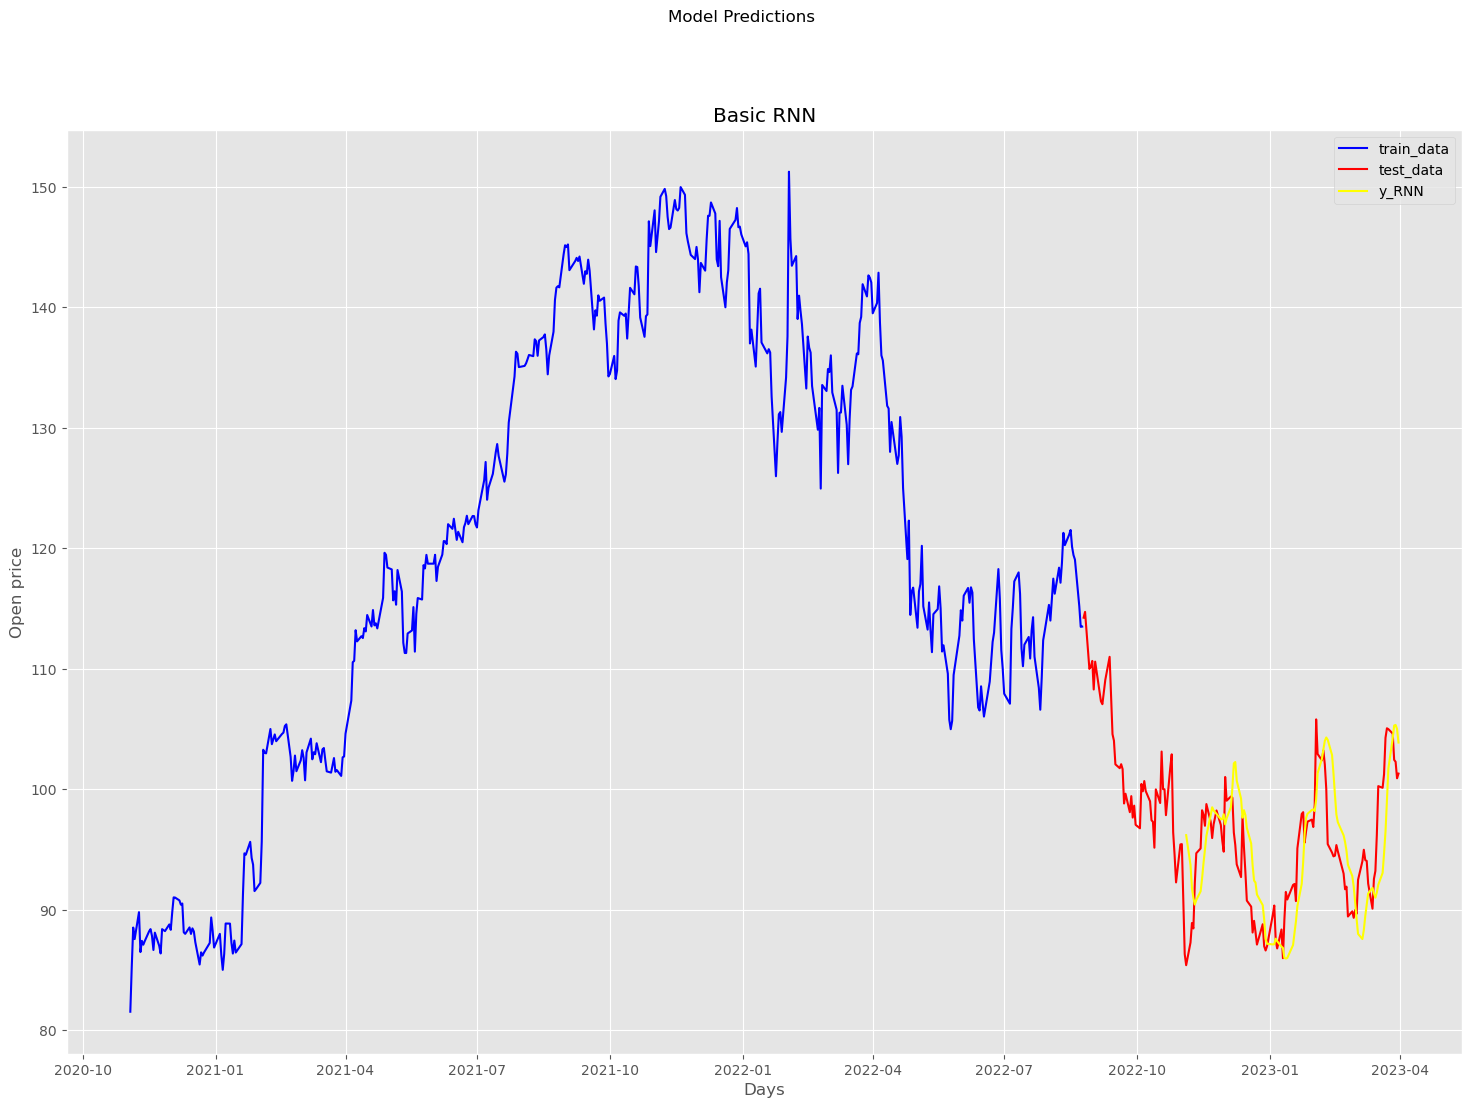

In [92]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
plt.plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
plt.plot(test_data.index, test_data.Open, label = "test_data", color = "r")
plt.plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "yellow")
plt.legend()
plt.title("Basic RNN")



plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()